In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
listings_details=pd.read_csv("D:/competition/listings_details.csv")

C:\Users\jiaji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#check data set shape
print("\nThe listings_details data size is : {} ".format(listings_details.shape)) 


The listings_details data size is : (55501, 106) 


In [4]:
#check the first 5 rows of data
listings_details.head()

id                        listing_url     scrape_id last_scraped  \
0  3781  https://www.airbnb.com/rooms/3781  2.020000e+13    3/12/2019   
1  5506  https://www.airbnb.com/rooms/5506  2.020000e+13    3/12/2019   
2  6695  https://www.airbnb.com/rooms/6695  2.020000e+13    3/12/2019   
3  6976  https://www.airbnb.com/rooms/6976  2.020000e+13    3/12/2019   
4  8789  https://www.airbnb.com/rooms/8789  2.020000e+13    3/12/2019   

                                                name  \
0                          HARBORSIDE-Walk to subway   
1     **$79 Special **   Private! Minutes to center!   
2                     $99 Special!! Home Away! Condo   
3  Mexican Folk Art Haven in Boston Residential Area   
4                Curved Glass Studio/1bd facing Park   

                                             summary  \
0  Fully separate apartment in a two apartment bu...   
1  This is a private guest room with private bath...   
2                                                NaN   
3  Come stay with me in Boston's Roslindale neigh...   
4  Bright, 1 bed with curved glass windows facing...   

                                               space  \
0  This is a totally separate apartment located o...   
1  **THE BEST Value in BOSTON!!*** PRIVATE GUEST ...   
2  ** WELCOME *** FULL PRIVATE APARTMENT In a His...   
3  This is a well-maintained, two-family house bu...   
4  Fully Furnished studio with enclosed bedroom. ...   

                                         description experiences_offered  \
0  Fully separate apartment in a two apartment bu...                none   
1  This is a private guest room with private bath...                none   
2  ** WELCOME *** FULL PRIVATE APARTMENT In a His...                none   
3  Come stay with me in Boston's Roslindale neigh...                none   
4  Bright, 1 bed with curved glass windows facing...                none   

                               neighborhood_overview        ...          \
0  Mostly quiet ( no loud music, no crowed sidewa...        ...           
1  Peacful, Architecturally interesting, historic...        ...           
2  Peaceful, Architecturally interesting, histori...        ...           
3  The LOCATION: Roslindale is a safe and diverse...        ...           
4  Beacon Hill is a historic neighborhood filled ...        ...           

  instant_bookable is_business_travel_ready          cancellation_policy  \
0                f                        f              super_strict_30   
1                t                        f  strict_14_with_grace_period   
2                t                        f  strict_14_with_grace_period   
3                f                        f                     moderate   
4                f                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             t                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               1   
1                               6   
2                               6   
3                               1   
4                              10   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            6   
2                                            6   
3                                            0   
4                                           10   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4      

In [5]:
#check variables
print(listings_details.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'
 'guests_include

# Clean Data
### We need to get rid of the dollar sign in order to do statistic analytics

In [6]:
# remove sign
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [7]:
listings_details.price=listings_details.price.apply(remove_sign,sign="$")

In [8]:
listings_details.weekly_price=listings_details.weekly_price.apply(remove_sign,sign="$")

In [9]:
listings_details.monthly_price=listings_details.monthly_price.apply(remove_sign,sign="$")

In [10]:
listings_details.security_deposit=listings_details.security_deposit.apply(remove_sign,sign="$")

In [11]:
listings_details.cleaning_fee = listings_details.cleaning_fee.apply(remove_sign,sign='$')

In [12]:
#We need to get rid of the % sign

listings_details.host_response_rate=listings_details.host_response_rate.apply(remove_sign,sign="%")

## Statistic Describe

In [13]:
listings_details.describe(include = 'all')

id                           listing_url     scrape_id  \
count   5.550100e+04                                 55501  5.550100e+04   
unique           NaN                                  8806           NaN   
top              NaN  https://www.airbnb.com/rooms/8309604           NaN   
freq             NaN                                     9           NaN   
mean    2.002247e+07                                   NaN  2.020000e+13   
std     9.570174e+06                                   NaN  0.000000e+00   
min     3.781000e+03                                   NaN  2.020000e+13   
25%     1.337899e+07                                   NaN  2.020000e+13   
50%     2.123864e+07                                   NaN  2.020000e+13   
75%     2.793570e+07                                   NaN  2.020000e+13   
max     3.879644e+07                                   NaN  2.020000e+13   

       last_scraped                                              name  \
count         55501                                             55492   
unique           12                                             10112   
top       7/14/2019  Lux 2 Bedroom by Fenway with washer/dryer & WIFI   
freq           6262                                               137   
mean            NaN                                               NaN   
std             NaN                                               NaN   
min             NaN                                               NaN   
25%             NaN                                               NaN   
50%             NaN                                               NaN   
75%             NaN                                               NaN   
max             NaN                                               NaN   

                                                  summary  \
count                                               54082   
unique                                               8522   
top     Featured in The New York Times, The Wall Stree...   
freq                                                  761   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    space  \
count                                               42087   
unique                                               5882   
top     Every booking is instantly confirmed. Every ca...   
freq                                                 1397   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description experiences_offered  \
count                                               55022               55501   
unique                                              10676                   1   
top     This complete furnished apartment is fully equ...                none   
freq                                                  249               55501   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                              

# Remove Outliers

In [14]:
#check the top 10 daily price for shared room 
listings_details[listings_details["room_type"]=="Shared room"].price.sort_values(ascending=False).head(10)

1471     750.0
38153    750.0
19854    750.0
44492    750.0
7714     750.0
13911    750.0
25647    750.0
31876    750.0
50643    750.0
29736    250.0
Name: price, dtype: float64

Text(0.5,1,'Before Remove Outliers')

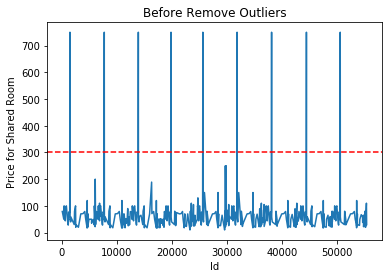

In [15]:
listings_details[listings_details["room_type"]=="Shared room"].price.plot()
plt.axhline(y=300, color='r', linestyle='--')
plt.xlabel("Id")
plt.ylabel("Price for Shared Room")
plt.title("Before Remove Outliers")

In [16]:
listings_details[listings_details["room_type"]=="Shared room"].price.describe()

count    640.000000
mean      63.362500
std       87.806783
min       10.000000
25%       28.000000
50%       50.000000
75%       73.000000
max      750.000000
Name: price, dtype: float64

In [17]:
#Daily price:$750 for Shared room is incredible, we need to remove.
listings_details=listings_details.drop(listings_details[(listings_details['price']==750.0)&(listings_details["room_type"]=="Shared room")].index)

In [18]:
#After remove
listings_details[listings_details["room_type"]=="Shared room"].price.describe()

count    631.000000
mean      53.568938
std       31.445310
min       10.000000
25%       28.000000
50%       50.000000
75%       71.000000
max      250.000000
Name: price, dtype: float64

Text(0.5,1,'After Remove Outliers')

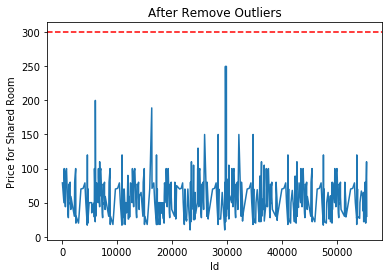

In [19]:
listings_details[listings_details["room_type"]=="Shared room"].price.plot()
plt.axhline(y=300, color='r', linestyle='--')
plt.xlabel("Id")
plt.ylabel("Price for Shared Room")
plt.title("After Remove Outliers")

In [20]:
#check the top 15 daily price for Private room 
listings_details[listings_details["room_type"]=="Private room"].price.sort_values(ascending=False).head(15)

36696    10000.0
30250    10000.0
36695    10000.0
36694    10000.0
30248    10000.0
30249    10000.0
30252    10000.0
36698    10000.0
42747     7948.0
29891     7948.0
55412     7948.0
36296     7948.0
55247     3600.0
55267     1550.0
36175     1550.0
Name: price, dtype: float64

Text(0.5,1,'Before Remove Outliers')

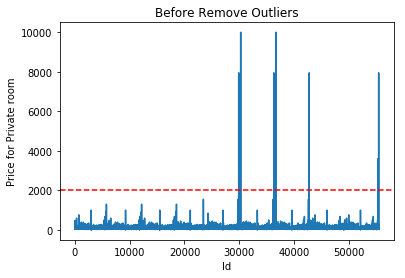

In [21]:
listings_details[listings_details["room_type"]=="Private room"].price.plot()
plt.axhline(y=2000, color='r', linestyle='--')
plt.xlabel("Id")
plt.ylabel("Price for Private room")
plt.title("Before Remove Outliers")

In [22]:
#Daily price>$3600 for private room is incredible, we need to remove.
listings_details=listings_details.drop(listings_details[(listings_details['price']>3600)&(listings_details["room_type"]=="Private room")].index)

In [23]:
#After remove
listings_details[listings_details["room_type"]=="Private room"].price.describe()

count    19167.000000
mean        85.188553
std         69.842456
min          0.000000
25%         50.000000
50%         70.000000
75%         99.000000
max       3600.000000
Name: price, dtype: float64

Text(0.5,1,'After Remove Outliers')

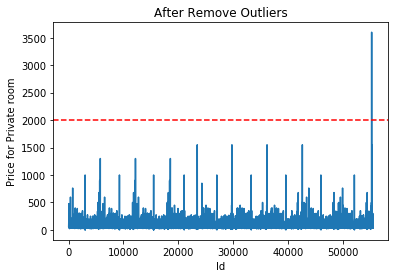

In [24]:
listings_details[listings_details["room_type"]=="Private room"].price.plot()
plt.axhline(y=2000, color='r', linestyle='--')
plt.xlabel("Id")
plt.ylabel("Price for Private room")
plt.title("After Remove Outliers")

In [25]:
#remove data with price is equal to 0
listings_details=listings_details.drop(listings_details[(listings_details['price']==0)].index)

# Features Engineering

## missing values

In [26]:
#check misssing values
print('listings_details columns with null values:\n', listings_details.isnull().sum())

listings_details columns with null values:
 id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                9
summary                                          1419
space                                           13414
description                                       479
experiences_offered                                 0
neighborhood_overview                           17812
notes                                           22037
transit                                         17760
access                                          22452
interaction                                     19317
house_rules                                     17631
thumbnail_url                                   55461
medium_url                                      55461
picture_url                           

In [27]:
all_data_na = (listings_details.isnull().sum() / len(listings_details)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
medium_url                       100.000000
xl_picture_url                   100.000000
neighbourhood_group_cleansed     100.000000
thumbnail_url                    100.000000
host_acceptance_rate             100.000000
license                           98.932583
square_feet                       98.050883
monthly_price                     92.055679
weekly_price                      91.884387
jurisdiction_names                44.808063
access                            40.482501
notes                             39.734228
interaction                       34.829880
host_about                        33.430699
neighborhood_overview             32.116262
transit                           32.022502
house_rules                       31.789906
security_deposit                  28.360470
space                             24.186365
host_response_time                21.761238

Text(0.5,1,'Percent Missing Data by Feature')

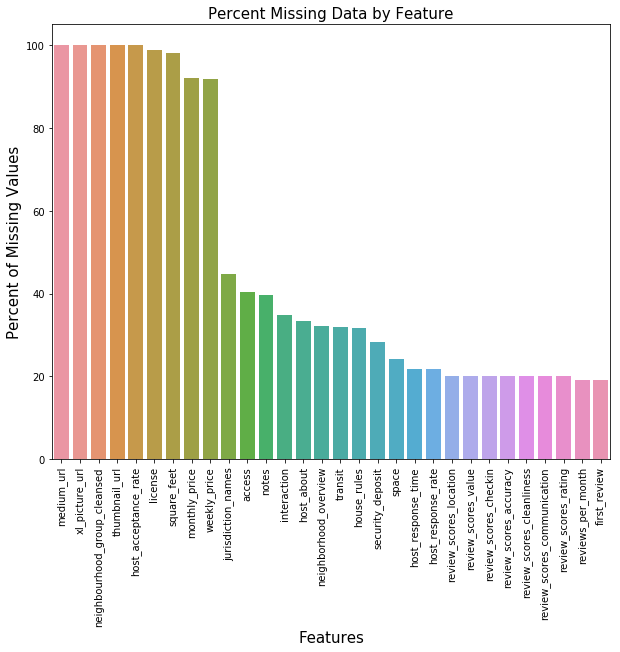

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Feature', fontsize=15)

## Drop variables which are unimportant to predict price or have many missing values.

### unimportant variables
"listing_url"
"scrape_id"
"last_scraped"
"name"
"thumbnail_url"
"medium_url","picture_url"
"xl_picture_url","host_url"
"host_name","host_thumbnail_url"
"host_picture_url"

In [29]:
listings_details.drop(["listing_url","scrape_id","last_scraped","name","thumbnail_url","medium_url","picture_url","xl_picture_url","host_url","host_name","host_thumbnail_url","host_picture_url"], axis = 1, inplace = True)

In [30]:
listings_details.drop(["street","city","state","zipcode","market","country_code","country"],axis =1, inplace=True)
listings_details.drop(["calendar_last_scraped"],axis =1, inplace=True)
listings_details.drop(["host_id","host_since"],axis =1, inplace=True)
listings_details.drop(['calendar_updated'],axis =1, inplace=True)
listings_details.drop(['smart_location'],axis =1, inplace=True)
listings_details.drop(['host_neighbourhood',"neighbourhood"],axis =1, inplace=True)
listings_details.drop(['last_review',"first_review"],axis =1, inplace=True)

In [31]:
listings_details.drop(["id"],axis=1,inplace=True)

### Drop variables which have many missing values

In [32]:
listings_details.drop(["host_acceptance_rate"],axis =1, inplace=True)
listings_details.drop(["neighbourhood_group_cleansed"],axis =1, inplace=True)
listings_details.drop(["license"],axis =1, inplace=True)
listings_details.drop(["square_feet"],axis =1, inplace=True)
listings_details.drop(["monthly_price"],axis =1, inplace=True)
listings_details.drop(["weekly_price"],axis =1, inplace=True)
listings_details.drop(["jurisdiction_names"],axis =1, inplace=True)
listings_details.drop(["access"],axis =1, inplace=True)

### Drop variables which are all same 

In [33]:
listings_details["experiences_offered"].describe()

count     55461
unique        1
top        none
freq      55461
Name: experiences_offered, dtype: object

In [34]:
#drop experiences_offered
listings_details.drop(["experiences_offered"], axis = 1, inplace = True)

In [35]:
listings_details["is_business_travel_ready"].groupby(listings_details["is_business_travel_ready"]).size()

is_business_travel_ready
f    55461
Name: is_business_travel_ready, dtype: int64

In [36]:
listings_details.drop(["is_business_travel_ready"],axis =1, inplace=True)

### Drop some character description

In [37]:
listings_details.drop(["summary","space","description","neighborhood_overview","notes","transit","interaction","host_location","host_about"],axis =1, inplace=True)

In [38]:
listings_details.drop(['house_rules'],axis =1, inplace=True)
listings_details.drop(['amenities'],axis =1, inplace=True)

In [39]:
#drop replicated column
listings_details.drop(["host_listings_count"],axis =1, inplace=True)

In [40]:
categorical_cols = [col for col in listings_details.columns if listings_details[col].dtypes == "object"]
print("number of categorical columns is: ")
print(len(categorical_cols))

number of categorical columns is: 
17


In [41]:
listings_details.shape

(55461, 55)

## Imputing missing values

In [42]:
#check missing ratio after drop some variables
all_data_na = (listings_details.isnull().sum() / len(listings_details)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
security_deposit                 28.360470
host_response_rate               21.761238
host_response_time               21.761238
review_scores_value              20.161916
review_scores_location           20.161916
review_scores_checkin            20.160113
review_scores_accuracy           20.127657
review_scores_cleanliness        20.095202
review_scores_communication      20.078974
review_scores_rating             20.068156
reviews_per_month                19.173834
cleaning_fee                     15.171021
bathrooms                         0.075729
bedrooms                          0.068517
beds                              0.034258
host_identity_verified            0.016228
host_has_profile_pic              0.016228
host_total_listings_count         0.016228
host_is_superhost                 0.016228

In [43]:
#security_deposit : use mean security_deposit to fill Na
listings_details.security_deposit=listings_details.security_deposit.fillna(round(listings_details.security_deposit.mean()))

In [44]:
#host_response_rate : use mean host_response_rate to fill Na
listings_details.host_response_rate=listings_details.host_response_rate.fillna(round(listings_details.host_response_rate.mean()))

In [45]:
#host_response_time : use most often appeared host_response_time to fill Na
listings_details.host_response_time.groupby(listings_details.host_response_time).size().sort_values(ascending=False)

host_response_time
within an hour        31597
within a few hours     7287
within a day           3923
a few days or more      585
Name: host_response_time, dtype: int64

In [46]:
listings_details.host_response_time=listings_details.host_response_time.fillna("within an hour")

In [47]:
#Group by neighborhood and fill in missing value by the median review_scores_location of all the neighborhood
listings_details["review_scores_location"] = listings_details.groupby("neighbourhood_cleansed")["review_scores_location"].transform(
    lambda x: x.fillna(x.median()))

In [48]:
listings_details["review_scores_value"]=listings_details["review_scores_value"].fillna(round(listings_details["review_scores_value"].mean()))

In [49]:
#review_scores_checkin : use mean review_scores_checkin to fill Na
listings_details["review_scores_checkin"]=listings_details["review_scores_checkin"].fillna(round(listings_details["review_scores_checkin"].mean()))

In [50]:
#review_scores_accuracy : use mean review_scores_accuracy to fill Na
listings_details["review_scores_accuracy"]=listings_details["review_scores_accuracy"].fillna(round(listings_details["review_scores_accuracy"].mean()))

In [51]:
#review_scores_cleanliness : use mean review_scores_cleanliness to fill Na
listings_details["review_scores_cleanliness"]=listings_details["review_scores_cleanliness"].fillna(round(listings_details["review_scores_cleanliness"].mean()))

In [52]:
#review_scores_rating : use mean review_scores_rating to fill Na
listings_details["review_scores_rating"]=listings_details["review_scores_rating"].fillna(round(listings_details["review_scores_rating"].mean()))

In [53]:
#Group by neighborhood and fill in missing value by the median review_scores_location of all the neighborhood
listings_details["review_scores_communication"] = listings_details.groupby("neighbourhood_cleansed")["review_scores_communication"].transform(
    lambda x: x.fillna(x.median()))

In [54]:
#reviews_per_month : use 0 to fill Na
listings_details["reviews_per_month"]=listings_details["reviews_per_month"].fillna(0)

In [55]:
#cleaning_fee : use mean cleaning_fee to fill Na
listings_details.cleaning_fee =listings_details.cleaning_fee.fillna(round(listings_details.cleaning_fee.mean()))

In [56]:
#bathrooms : use most often appeared bathrooms to fill Na
listings_details.bathrooms.groupby(listings_details.bathrooms).size()

bathrooms
0.0      106
0.5       56
1.0    40942
1.5     3049
2.0     9125
2.5     1101
3.0      666
3.5      263
4.0       71
4.5       18
5.0       13
6.0        9
Name: bathrooms, dtype: int64

In [57]:
listings_details.bathrooms =listings_details.bathrooms.fillna(1)

In [58]:
#bedrooms : use most often appeared bedrooms to fill Na
listings_details.bedrooms.groupby(listings_details.bedrooms).size()

bedrooms
0.0      6361
1.0     31776
2.0     11820
3.0      3839
4.0      1083
5.0       378
6.0       119
7.0        32
8.0        10
13.0        4
16.0        1
Name: bedrooms, dtype: int64

In [59]:
listings_details.bedrooms =listings_details.bedrooms.fillna(1)

In [60]:
#beds : use most often appeared beds to fill Na
listings_details.beds.groupby(listings_details.beds).size()

beds
0.0       167
1.0     30108
2.0     13987
3.0      6816
4.0      2322
5.0       930
6.0       448
7.0       209
8.0       134
9.0        80
10.0       80
11.0       43
12.0       31
13.0       18
14.0        3
16.0       35
17.0       18
19.0        8
20.0        1
24.0        4
Name: beds, dtype: int64

In [61]:
listings_details.beds =listings_details.beds.fillna(1)

In [62]:
#host_identity_verified : use "f" to fill Na
listings_details.host_identity_verified=listings_details.host_identity_verified.fillna("f")

In [63]:
#host_has_profile_pic : use "f" to fill Na
listings_details.host_has_profile_pic=listings_details.host_has_profile_pic.fillna("f")

In [64]:
listings_details.host_total_listings_count.groupby(listings_details.host_total_listings_count).size().sort_values(ascending=False).head(1)

host_total_listings_count
1.0    16396
Name: host_total_listings_count, dtype: int64

In [65]:
#host_total_listings_count : use most often appeared host_total_listings_count to fill Na
listings_details.host_total_listings_count=listings_details.host_total_listings_count.fillna(1)

In [66]:
#host_is_superhost : use most "f" to fill Na
listings_details.host_is_superhost=listings_details.host_is_superhost.fillna("f")

In [67]:
listings_details=listings_details.drop(listings_details[listings_details["review_scores_location"].isnull()==True].index)
listings_details=listings_details.drop(listings_details[listings_details["review_scores_communication"].isnull()==True].index)

In [68]:
all_data_na = (listings_details.isnull().sum() / len(listings_details)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

## Data Correlation

Text(0.5,1,'Heatmap of Useful Features')

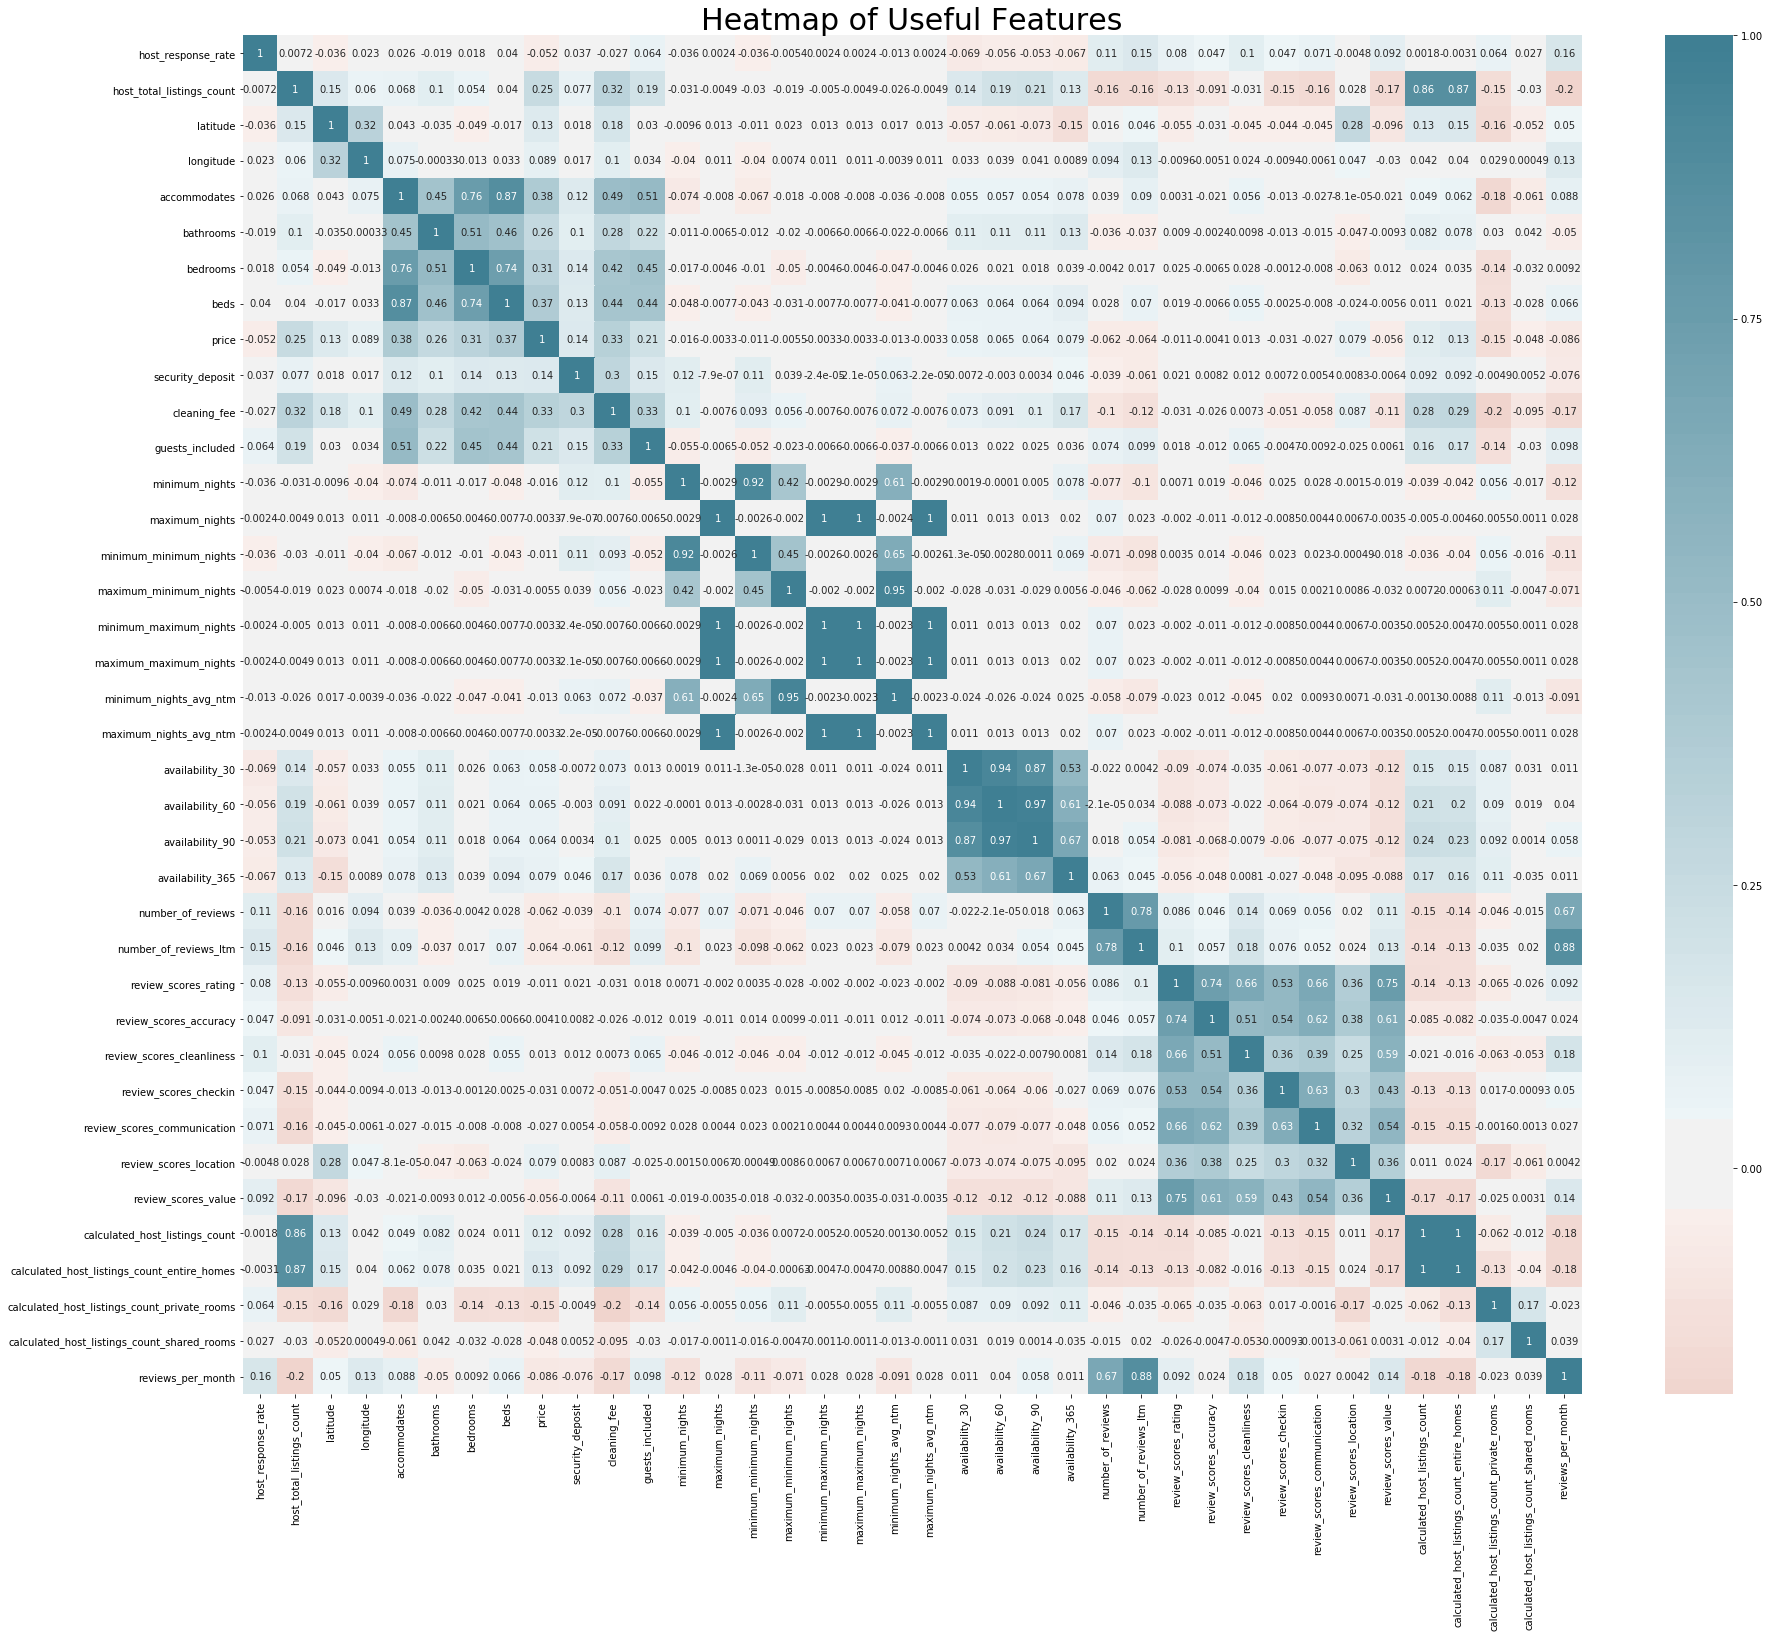

In [69]:
plt.subplots(figsize = (30,25))
## Plotting heatmap. 
sns.heatmap(listings_details.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0);
## Give title. 
plt.title("Heatmap of Useful Features", fontsize = 30)

## More features engeneering

### Label Encoding some categorical variables that may contain information in their ordering set

In [70]:
categorical_cols = [col for col in listings_details.columns if listings_details[col].dtypes == "object"]
print("number of categorical columns is: ")
print(len(categorical_cols))

number of categorical columns is: 
17


In [71]:
categorical_cols

['host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'extra_people',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [72]:
from sklearn.preprocessing import LabelEncoder
cols = ('host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'extra_people',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(listings_details[c].values)) 
    listings_details[c] = lbl.transform(list(listings_details[c].values))

# shape        
print('Shape all_data: {}'.format(listings_details.shape))

Shape all_data: (55460, 55)


## Adding one more important feature

### Since guest_include and the number of bedrooms are closely related with each other,we add one more feature which is guest_include*bedrooms

In [73]:
# Adding total sqfootage feature 
listings_details["guests_included*bedrooms"] = listings_details['guests_included']*listings_details['bedrooms']

## Log tranform the target because it's skewed to the right

C:\Users\jiaji\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 195.12 and sigma = 270.38



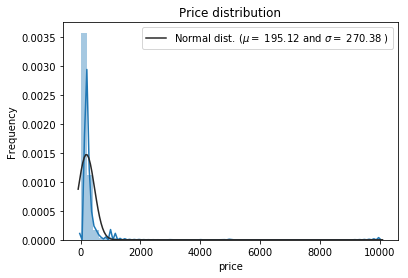

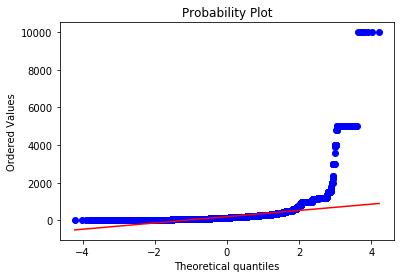

In [74]:
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
sns.distplot(listings_details['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(listings_details['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(listings_details['price'], plot=plt)
plt.show()

C:\Users\jiaji\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 4.96 and sigma = 0.75



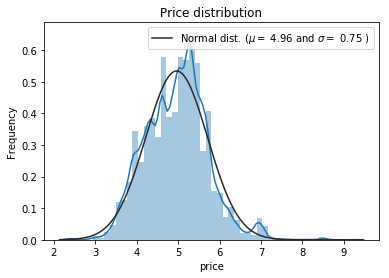

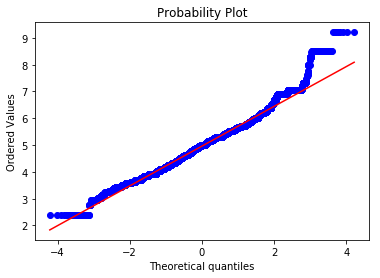

In [75]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
listings_details["price"] = np.log1p(listings_details["price"])

#Check the new distribution 
sns.distplot(listings_details["price"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(listings_details["price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(listings_details["price"], plot=plt)
plt.show()

# Machine Learning

In [76]:
#get train_x and train_y
train_y=listings_details["price"]
train_y=train_y.values.reshape(-1,1)
listings_details.drop(["price"],axis =1, inplace=True)
train_x=listings_details

In [77]:
#split data as X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,
                                                   random_state = 1,
                                                   test_size = 0.3)

In [78]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
X_train = scaler.fit_transform(X_train)
# transform "x_test"
X_test = scaler.transform(X_test)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [80]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## RandomForestRegressor

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rf_model = RandomForestRegressor(n_estimators=200,
                          max_features=None,
                          oob_score=False,
                          random_state=42)

In [169]:
rf_model.fit(X_train, y_train)

C:\Users\jiaji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [170]:
rf_val_predictions = rf_model.predict(X_test)
rf_val_mae = mean_absolute_error(rf_val_predictions, y_test)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0


In [82]:
rf_model.score(X_train, y_train)

0.9953298975624898

In [83]:
rf_model.score(X_test, y_test)

0.9672106650135358

In [84]:
rf_model_pred=rf_model.predict(X_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, rf_model_pred))))

Root Mean Square Error test = 0.13564977811328668


## GBoost

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
GBoost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.05,
                                   max_depth=4,
                                   min_samples_leaf=5, min_samples_split=5, 
                                   loss='huber', random_state =5)

In [86]:
GBoost.fit(X_train,y_train)

C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [87]:
GBoost.score(X_train,y_train)

0.9449390847826921

In [88]:
GBoost.score(X_test,y_test)

0.9199899331803699

In [89]:
GBoost_pred=GBoost.predict(X_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, GBoost_pred))))

Root Mean Square Error test = 0.21189714239281915


In [179]:
import xgboost as xgb

## XGBoost

In [180]:
xgb=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0,
       importance_type='gain', learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [181]:
xgb.fit(X_train,y_train)

[20:55:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0,
       importance_type='gain', learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [182]:
xgb.score(X_train,y_train)

0.9293100575676068

In [115]:
xgb.score(X_test,y_test)

0.9068650462791137

In [116]:
xgb_pred=xgb.predict(X_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xgb_pred))))

Root Mean Square Error test = 0.22861732292912815


## lightgbm

In [161]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=7,
                                       learning_rate=0.07, 
                                       n_estimators=8000,
                                       bagging_fraction=0.85,
                                       bagging_freq=2, 
                                       bagging_seed=2,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=2,
                                       verbose=-1)

In [162]:
lightgbm .fit(X_train,y_train)

C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.85, bagging_freq=2, bagging_seed=2,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=2,
       importance_type='split', learning_rate=0.07, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=8000, n_jobs=-1, num_leaves=7, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1)

In [163]:
lightgbm.score(X_train,y_train)

0.9620329331103199

In [164]:
lightgbm.score(X_test,y_test)

0.9344094671625355

In [165]:
lightgbm_predictions = lightgbm.predict(X_test)
lightgbm_mae = mean_absolute_error(lightgbm_predictions, y_test)
print("Validation MAE for lightgbm: {:,.0f}".format(lightgbm_mae))

Validation MAE for lightgbm: 0


In [166]:
lightgbm_pred=lightgbm.predict(X_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, lightgbm_pred))))

Root Mean Square Error test = 0.1918551064176578


In [167]:
cross_val_score(lightgbm,X_train,y_train).mean()

C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jiaji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9225011430638159